# Projeto 1 - Ciência dos Dados

Nome: João Pedro Reis Lima

Nome: Lucas Gurgel 

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [45]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re 
import emoji
from emoji import UNICODE_EMOJI
from random import *
from sklearn.model_selection import train_test_split

In [46]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\lucas\Downloads\Projeto-1-CDADOS


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [47]:
filename = 'esquadrão suicida 2.xlsx'

In [48]:
dados = pd.read_excel(filename)
dados.head(5)

,Treinamento,relevancia
0,to feliz q da p prestar atenção e gostar de vá...,1
1,os roteirista de esquadrão suicida 2 devem ter...,0
2,assistir esse esquadrão suicida 2 de marola,0
3,e eu e gilson que fechamos a sala de cinema p ...,0
4,"esquadrão suicida 2 é muito bom, amei o filme",1


In [49]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,relevancia
0,assisti esquadrão suicida 2 com um pouco de at...,0
1,"vou ver esquadrão suicida 2 hj, vcs já viram?",0
2,@lsdcomixxx adm hj eu sonhei que ele tava no e...,0
3,ranking personagens do esquadrão suicida:\n\n1...,1
4,mano gloria groove no esquadrão suicida 2 fico...,1


___
## Classificador automático de sentimento


Nós consideramos relavante comentários que demostravam alguma critica ao produto tais como: Se a pessoa gostou ou não da obra, o que ela sentiu(emoção), também consideramos personagens favoritos como algo relavante 

Não consideramos comentarios de situações adversas sem relação direta com a criticidade da obra, tal como comentarios pessoais

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

### Limpando o Excel


In [50]:
def cleanup(text):
    punctuation = '[”@\-/!.:?;,°''"|()#$%¨&*]'
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed

In [51]:
def minusculo(text):  # colocando em letra minuscula
    return text.lower()

In [52]:
def separa_emoji(tweet):
    modified=' '.join(emoji.get_emoji_regexp().split(tweet))
    modified=modified.split()
    for i,emoji1 in enumerate(modified):
        if emoji1 in UNICODE_EMOJI['pt']:
            modified[i]=UNICODE_EMOJI['pt'][emoji1].replace(':','')
        else:
            continue
    modified=' '.join(modified)
        
    return modified

In [53]:
def limpatudo(text):  # função que aplica as limpezas anteriores 
    tira_pontuacao = cleanup(text)
    tudo_minusculo = minusculo(tira_pontuacao)
    limpo = (separa_emoji(tudo_minusculo))
    
    return limpo



In [54]:
def lista(df):   # Função que separa as Frases em palavras
    listaf = []
    lista = df.values.tolist() 
    for i in lista:
        for palavra in i.split():
            listaf.append(palavra)
        
    return listaf

In [55]:
#Transformando palavras em variáveis categóricas:
dados['Treinamento'] = dados['Treinamento'].astype('category')
test['Teste'] = test['Teste'].astype('category')

In [56]:
dados['Treinamento']=dados['Treinamento'].apply(limpatudo)
test['Teste']=test['Teste'].apply(limpatudo)

In [57]:
#Separando a Planilha de Treinamento de acordo com a relevancia

IR = dados['relevancia'] == 0
R = dados['relevancia'] == 1

dados_r = dados.loc[R,:]
dados_ir = dados.loc[IR,:]

dados_r

,Treinamento,relevancia
0,to feliz q da p prestar atenção e gostar de vá...,1
4,esquadrão suicida 2 é muito bom amei o filme,1
5,henriquenarizz kkkkkk amigo mas pior que o esq...,1
8,ruanfalco dccomics tô p assistir esquadrão sui...,1
16,ei gostei de esquadrão suicida 2 e é só minha ...,1
...,...,...
290,achei esquadrão suicida 2 chatokkkk,1
291,fui assistir o esquadrão suicida 2 muito gore ...,1
294,nossa depende hq's dc e tvcinema a marvel poré...,1
296,vi esquadrão suicida 2 hj com minhas irmã e é ...,1


In [58]:
#Aplicando a separação no dataframe de treinamento 
pdr = lista(dados_r.Treinamento)   
pdir = lista(dados_ir.Treinamento)


#Transformando o em pd.series
pdrc = pd.Series(pdr) 
pdirc = pd.Series(pdir) 

# extraindo a frequência absoluta
fpdr=pdrc.value_counts()
fpdir=pdirc.value_counts()

In [59]:
# Colocando as palavras em um Banco de dados e uma lista total
listadr = pdrc.tolist()
listadir = pdirc.tolist()

lista_total2 = pd.Series(listadr + listadir)

Banco_de_dados=set(listadr+listadir)






In [60]:
# probabilidade de ser relevante:
pr = len(listadr)/len(lista_total2)
# probabilidade de ser irrelevante:
pi = len(listadir)/len(lista_total2)



print(pr+pi)



1.0


In [61]:
def laplace(freqabsoluta,conjunto):
    return (freqabsoluta+1)/((conjunto)+len(Banco_de_dados))

In [62]:
def prob_R(text):
    Prob1 = 1
    for i in text.split():
        if i in fpdr:

            Alaplace_relevante = laplace(fpdr[i], pr)
        
            Prob1 *= Alaplace_relevante
        else:
            Alaplace_relevante = laplace(0, pr)
        
            Prob1 *= Alaplace_relevante
    return Prob1

print(prob_R('assistir esse esquadrão suicida 2 de marola'))



3.8797434144662763e-13


In [63]:
def prob_I(text):
    Prob2 = 1
    for i in text.split():
        if i in fpdir:

            Alaplace_irrelevante = laplace(fpdir[i], pi)
        
            Prob2 *= Alaplace_irrelevante
        else:
            Alaplace_irrelevante = laplace(0, pi)
        
            Prob2 *= Alaplace_irrelevante
    return Prob2


In [64]:
def probabilidades(text):
    if prob_R(text)*pr > prob_I(text)*pi:
        return 1
    else:
        return 0

print(probabilidades('vi esquadrão suicida 2 hj com minhas irmã ')) 

0


In [65]:
dados['Classificado'] = dados.Treinamento.apply(probabilidades)

In [66]:
dados

,Treinamento,relevancia,Classificado
0,to feliz q da p prestar atenção e gostar de vá...,1,1
1,os roteirista de esquadrão suicida 2 devem ter...,0,0
2,assistir esse esquadrão suicida 2 de marola,0,0
3,e eu e gilson que fechamos a sala de cinema p ...,0,0
4,esquadrão suicida 2 é muito bom amei o filme,1,1
...,...,...,...
295,eu sou humano e posso sonhar homem de aço 2 fo...,0,0
296,vi esquadrão suicida 2 hj com minhas irmã e é ...,1,1
297,1 eu ainda não vi o esquadrão suicida então eu...,0,0
298,harrymetalfan tem esquadrao suicida 2 pensei q...,0,0


___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [82]:
dadossepara1=dados.loc[(dados['Classificado']==1)&(dados['relevancia']==1),:]
dadosverdadeiro1=dadossepara1.shape[0]
dadossepara2=dados.loc[(dados['Classificado']==0)&(dados['relevancia']==0),:]
dadosverdadeiro2=dadossepara2.shape[0]
soma1 = dadosverdadeiro1 + dadosverdadeiro2
score2=soma1/dados.shape[0]
print(score2*100)

96.33333333333334


In [68]:
test['Classificado']=test.Teste.apply(probabilidades)

In [69]:
test

,Teste,relevancia,Classificado
0,assisti esquadrão suicida 2 com um pouco de at...,0,0
1,vou ver esquadrão suicida 2 hj vcs já viram,0,0
2,lsdcomixxx adm hj eu sonhei que ele tava no es...,0,0
3,ranking personagens do esquadrão suicida 1 blo...,1,0
4,mano gloria groove no esquadrão suicida 2 fico...,1,0
...,...,...,...
195,num gostei de esquadrão suicida 2 rosto_sorrid...,1,0
196,a ratcatcher 2 ganhou meu coração viu se tiver...,1,0
197,esquadrão suicida 2 eh uma bosta tipo 010 top ...,1,1
198,quem nasceu pra esquadrão suicida 1 jamais ser...,1,0


In [70]:
testsepara1=test.loc[(test['Classificado']==1)&(test['relevancia']==1),:]
testverdadeiro1=testsepara1.shape[0]
testsepara2=test.loc[(test['Classificado']==0)&(test['relevancia']==0),:]
testverdadeiro2=testsepara2.shape[0]
soma = testverdadeiro1 + testverdadeiro2
score=soma/test.shape[0]
print(score*100)

77.5


In [71]:
pd.crosstab(test['Classificado'], test['relevancia'], normalize=True)


relevancia,0,1
Classificado,,
0,0.540,0.190
1,0.035,0.235


Verdadeiro Positivo: 23,5%

Verdadeiro Negativo: 54%

Falso Positivo: 3,5%

Falso Negativo: 19%

___
### Concluindo

Dado o exposto, percebe-se que o nosso modelo baseado no Naive Bayes, podemos concluir a partir das respectivas porcentagens do verdadeiro positivo e verdadeiro negativo: 23,5% e 54%, as quais juntas somam 77,5% de acurácia, isso mostra que o nosso modelo é eficiente. Entretanto, os respectivos valores de falso positivo e negativo: 3,5% e 19%, ainda possuem altas taxas, isso ocorre por vários motivos, tal como a baixa variedade de palavras no banco de dados, o que faz com que palavras que possuem similaridade, as que são classificadas como relevante e irrelevante, não estão na base de dados, mesmo possuindo semântica e significados análogos e que no cálculo suas probabilidades não são levadas em consideração(são nulo/0). Outro fator importante na análise e que também confirma o que foi, anteriormente, visto é a diferença entre os percentuais de acurácia entre a base de treinamento e teste, que é de cerca de de 18,8%, isso acontece, pois o tamanho da base de dados é diferente e isso implica na acurácia na base Teste.    


Além disso, nosso modelo na maioria das vezes não apresenta problema com as palavras de dupla negação ou sarcasmo, mas mesmo assim nossa função não leva em consideração o real sentido da palavra e sim somente sua probabilidade, o que faz com que possa ter certos erros, por exemplo: 

In [72]:
# 1 = relevante
# 0 = irrelevante


print(probabilidades('esquadrão suicida 2 é tão ruim que é bom ')) 
print(probabilidades('q q a dc quer c os filme dela mn n faz um filme bom kkkkkkkkkkkkkkkkkkkk esquadrao suicida 2 unico ponto forte eh a comedia, fora isso??¿?¿¿‽‽')) 
print(probabilidades('esquadrão suicida 2 é tão ruim quanto assistir esquadrão suicida 1 2 vezes ')) #Fase criada para titulo de demonstração do problema

1
1
1


Podemos concluir que nas frases anteriores, apesar de classificar bem as frases de dupla negação, o nosso sistema ainda comete alguns erros, como visto na última frase, a qual deveria ser relevante por causa da critica ao filme.

Portanto, eles devem continuar financiando nosso projeto, visto que com melhorias nesses problemas vistos anteriormente, podemos desenvolver um sistema melhor, com uma melhor acurácia, o qual poderia ser implementado em outras situações.

## PORQUÊ NÃO PODE USAR O PRÓPRIO CLASSIFICADOR PARA GERAR MAIS AMOSTRAS DE TREINAMENTO?
Como já foi dito anteriormente, o nosso modelo não entende o real sentido da palavra em seus diferentes contextos, logo aumentar o número de palavras só acarretaria em uma menor porcentagem na taxa de acurácia.

## Diferente cenários para Naives Bayes fora do contexto do projeto. 
1º - Podemos usar o nosso sistema para a detecção de emails, podendo classifica-los entre aqueles que são relevantes ou não, podendo , aqueles que não são relevantes, enviados para a caixa de spam.
2º - Outra situação bastante útil, seria analisar textos em redes sociais, onde o sistema detectaria se tal mensagem feita por uma pessoas demonstra felicidade ou tristeza, tal feito ajudaria na descoberta de possíveis problemas que a pessoa poderia esta passando.
3º - Outra, seria em prever se vai chover ou não no próximo dia, de acordo com as medições no dia de hoje, analisando a umidade, temperatura, por exemplo.


___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

In [73]:
tIR = test['relevancia'] == 0
tR = test['relevancia'] == 1

test_tr = test.loc[tR,:]
test_tir = test.loc[tIR,:]

test_tr

,Teste,relevancia,Classificado
3,ranking personagens do esquadrão suicida 1 blo...,1,0
4,mano gloria groove no esquadrão suicida 2 fico...,1,0
7,esquadrão suicida 2 é tão ruim que é bom,1,1
9,esquadrão suicida 2 que viagem kkk,1,0
11,esquadrão suicida 2 mto bom da pra fingir q o ...,1,1
...,...,...,...
195,num gostei de esquadrão suicida 2 rosto_sorrid...,1,0
196,a ratcatcher 2 ganhou meu coração viu se tiver...,1,0
197,esquadrão suicida 2 eh uma bosta tipo 010 top ...,1,1
198,quem nasceu pra esquadrão suicida 1 jamais ser...,1,0


In [74]:
#Aplicando a separação no dataframe de test
ptr = lista(test_tr.Teste)   
ptir = lista(test_tir.Teste)


#Transformando o em pd.series
ptrc = pd.Series(ptr) 
ptirc = pd.Series(ptir) 

# extraindo a frequência absoluta
fptr=ptrc.value_counts()
fpir=ptirc.value_counts()


In [75]:
#Concatenando as planilhas do excel tem que mudar para o mesmo nome da coluna
xaropinho = dados.rename(columns={'Treinamento':'Frases'})
xaropinha = test.rename(columns={'Teste':'Frases'})

junta = pd.concat([xaropinho,xaropinha], ignore_index=True)

In [76]:

lista_score=[]
for i in range(0,100):
    X_dados,X_test = train_test_split(junta,train_size=0.6,random_state=None)
    
    X_dados['Frases']=X_dados['Frases'].apply(limpatudo)
    X_test['Frases']=X_test['Frases'].apply(limpatudo)
    X_dadosIr = X_dados['relevancia'] == 0
    X_dadosR = X_dados['relevancia'] == 1

    X_dados_r = X_dados.loc[X_dadosR,:]
    X_dados_ir = X_dados.loc[X_dadosIr,:]

    X_dadosr = lista(X_dados_r.Frases)   
    X_dadosir = lista(X_dados_ir.Frases)
    
    #Transformando o em pd.series
    X_dadosrC = pd.Series(X_dadosr) 
    X_dadosirC = pd.Series(X_dadosir) 

    # extraindo a frequência absoluta
    fpdr=X_dadosrC.value_counts()
    fpdir=X_dadosirC.value_counts()

    # Colocando as palavras em um Banco de dados e uma lista total
    X_dadosr = X_dadosrC.tolist()
    X_dadosir = X_dadosirC.tolist()

    listaX_dados = pd.Series(X_dadosr + X_dadosir)
    Banco_de_dados=set(X_dadosr+X_dadosir)

    # probabilidade de ser relevante:
    pr = len(X_dadosr)/len(listaX_dados)
    # probabilidade de ser irrelevante:
    pi = len(X_dadosir)/len(listaX_dados)

    X_dados['Nova Classificação'] = X_dados.Frases.apply(probabilidades)
    X_test['Nova Classificação'] = X_test.Frases.apply(probabilidades)
    
    X_testsepara1=X_test.loc[(X_test['Nova Classificação']==1)&(X_test['relevancia']==1),:]
    X_testverdadeiro1=X_testsepara1.shape[0]
    X_testsepara2=X_test.loc[(X_test['Nova Classificação']==0)&(X_test['relevancia']==0),:]
    X_testverdadeiro2=X_testsepara2.shape[0]
    soma = X_testverdadeiro1 + X_testverdadeiro2
    score=soma/X_test.shape[0]
    lista_score.append(score*100)

    


    

    
    


    

    


<ipython-input-76-2c5f9ae3d17b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_dados['Frases']=X_dados['Frases'].apply(limpatudo)
<ipython-input-76-2c5f9ae3d17b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Frases']=X_test['Frases'].apply(limpatudo)
<ipython-input-76-2c5f9ae3d17b>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

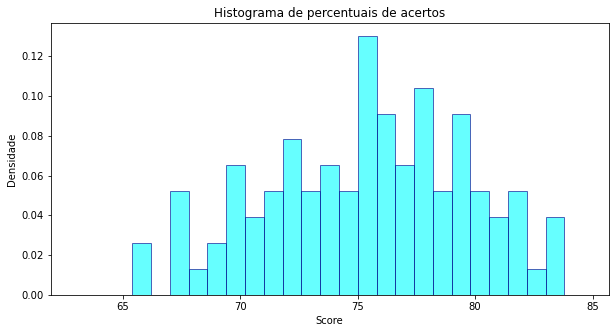

In [77]:
faixa=np.arange(63, 85, 0.8)
plt.figure(figsize=(10, 5))
plt.hist(lista_score, bins=faixa, edgecolor='darkblue', color='cyan', alpha=0.6, density=True)
plt.title('Histograma de percentuais de acertos')
plt.ylabel('Densidade')
plt.xlabel('Score')
plt.show()




In [78]:
media=sum(lista_score)/len(lista_score)
print(media)

74.76


Podemos concluir que quando o classificador é feito em uma única divisão entre treinamento e teste, o modelo pode assumir valores bem distintos, o que tem como consequência no campo da análise, uma mitigação na sua credibilidade, por isso é de extrema importância que seja feita uma análise de dados considerando as possíveis variações de resultados, como visto, em decorrer dos scores obtidos 100X. Em suma, percebe-se que é uma desvantagem fazer uma única divisão da base de dados, pois não retornará a melhor acurácia do modelo. 

In [79]:
X_test['Nova Classificação']

169    0
179    0
421    0
218    0
243    1
      ..
70     0
182    0
193    0
128    0
82     0
Name: Nova Classificação, Length: 200, dtype: int64

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* CORRIGIU separação de espaços entre palavras e emojis ou entre emojis e emojis
* CRIOU categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante. Pelo menos quatro categorias, com adição de mais tweets na base, conforme enunciado. (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item 6. Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**